In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# A: Biorender figure of methods
# B: Overview figure from R
# C: Top Marker Dotplot
# D: UMAPs, cell-rank analysis in separate notebook
# E-F: mIHC

In [2]:
integrated = sc.read_h5ad('../../results/integrated/integrated_GEX.h5ad')
# integrated.obs['pred.type'][integrated.obs['pred.type'].isin(['Unknown'])]


In [3]:
## Top 5 protein coding marker gens for each cell class
markers= {"corticotrophs": ['POMC','PCDH9', 'TBX19','NNAT','CADM2'],
          "somatotrophs": ['GH1','SGCZ','DLGAP2','ZNF804B','KCNMB2'],
          "lactotrophs": ['PRL','ROBO1','LRRTM4','ATP1B3','SV2C'],
          "gonadotrophs": ['CGA', 'LHB', 'TGFBR3L', 'ESR1', 'CNTNAP2'],
          "fsc": ['IQCJ-SCHIP1', 'PPP2R2B', 'NTNG1', 'FRAS1', 'RFX4'],
          "endothelial": ['LDB2', 'PLEKHG1', 'EMCN', 'FLT1', 'ADGRL4'],
          "pericytes": ['RBMS3', 'CDH12', 'LSAMP', 'CACNA1E', 'TIPARP'],
          "leukocyte": ['ARHGAP15', 'SRGN', 'PTPRC', 'MSR1', 'CD74'],
          "Unknown": ['KCNIP4', 'CDH12', 'CALN1', 'DOCK4', 'KAZN']}

## Aesthetics 
colors = sns.color_palette('bright', 9)
TNcdict = {'core':colors[3], 'margin':colors[0]}
ct_dict = {"corticotrophs": colors[3],
          "somatotrophs": colors[0],
          "lactotrophs": colors[1],
          "gonadotrophs": colors[2],
          "fsc": colors[4],
          "endothelial": colors[5],
          "pericytes": colors[6],
          "leukocyte": colors[7],
          "Unknown": colors[8]}

/Users/mullaneydb/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/mullaneydb/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/Users/mullaneydb/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


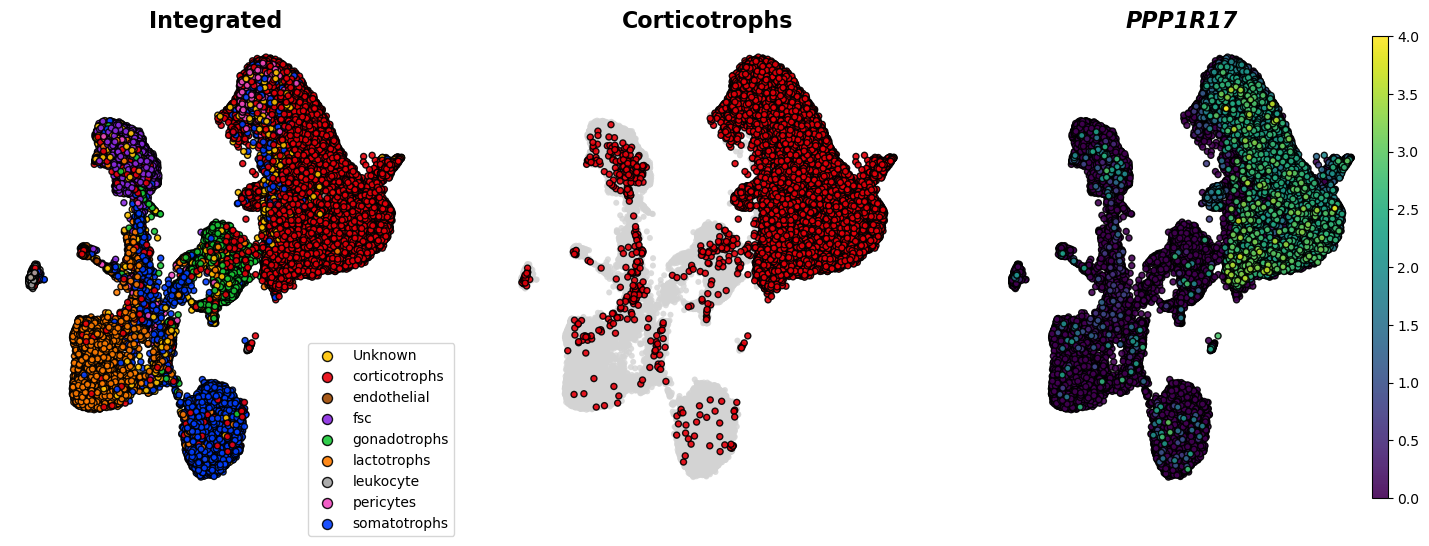

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(18,6))
ax1_dict = sc.pl.umap(integrated, 
                     use_raw = False, 
                     frameon=False, 
                     show=False,
                     ax = ax1,
                     color = "pred.type", 
                     s = 75,
                     palette = ct_dict,
                     edgecolor = 'black', 
                     alpha = 0.9,
                     )
ax2_dict = sc.pl.umap(integrated, 
                     use_raw = False, 
                     frameon=False, 
                     show=False,
                     ax = ax2,
                     s = 75,
                     alpha = 0.8,
                     )
ax2_dict2 = sc.pl.umap(integrated[integrated.obs['pred.type'].isin(['corticotrophs'])], 
                     use_raw = False, 
                     frameon=False, 
                     show=False,
                     ax = ax2,
                     color = "pred.type",
#                      add_outline=True,
                     
                     s = 75,
                     edgecolor = 'black', 
                     alpha = 0.9, 
                     )
ax3_dict = sc.pl.umap(integrated, 
                     use_raw = False, 
                     frameon=False, 
                     show=False,
                     ax = ax3,
                     color = "PPP1R17", 
                     s = 75,
                     cmap='viridis',
                     edgecolor = 'black', 
                     alpha = 0.9,
                     vmin=0, vmax=4
                     )

#add legend to plot
handles, labels = plt.gca().get_legend_handles_labels()

leg1 = ax1.legend(prop = {'size':'10'}, markerscale=1.2, bbox_to_anchor=(1.1, 0.35))
for lh in leg1.legend_handles: 
    lh.set_alpha(0.9)
    lh.set_edgecolor("black")

ax2.get_legend().remove()

ax1.set_title("Integrated", fontweight="bold", fontsize=16)
ax2.set_title("Corticotrophs", fontweight="bold", fontsize=16)
ax3.set_title("PPP1R17", fontweight="bold", fontstyle='italic', fontsize=16)

fig.savefig('umap.pdf',bbox_inches='tight')

/Users/mullaneydb/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


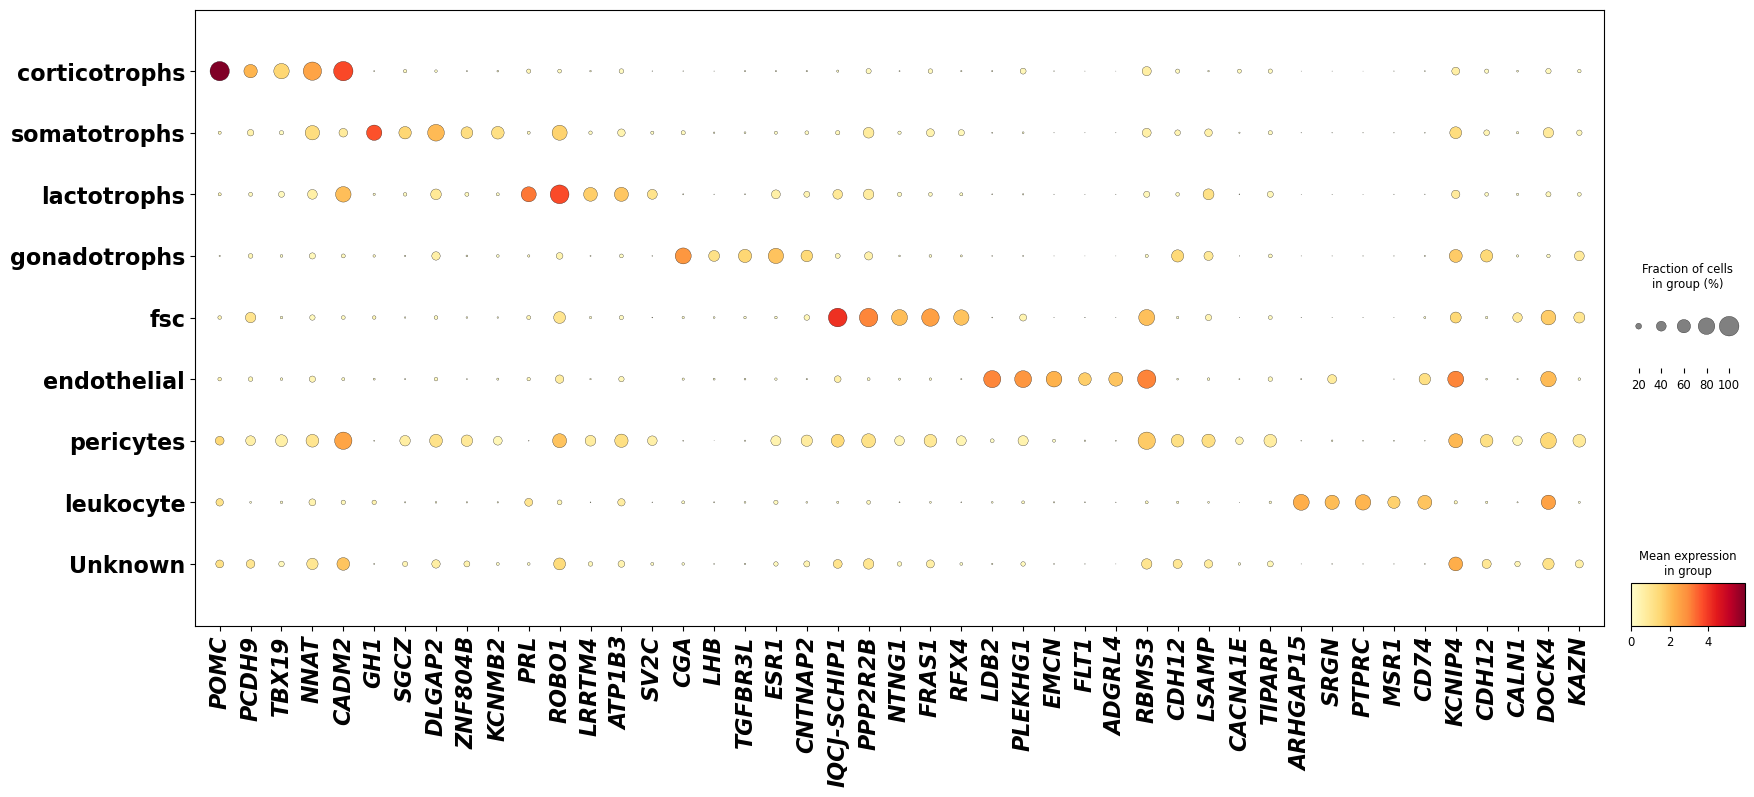

In [5]:
all_markers = []
for key in markers.keys():
    all_markers += markers[key]
   
dotplot = sc.pl.dotplot(integrated, all_markers, 'pred.type', 
                        categories_order = list(markers.keys()),
                        cmap = 'YlOrRd',
                        use_raw=False,# ax=ax, 
                        return_fig=True,
                        figsize=(20,8))

xticks = dotplot.get_axes()['mainplot_ax'].get_xticks()
xlabels = dotplot.get_axes()['mainplot_ax'].get_xticklabels()
yticks = dotplot.get_axes()['mainplot_ax'].get_yticks()
ylabels = dotplot.get_axes()['mainplot_ax'].get_yticklabels()
dotplot.get_axes()['mainplot_ax'].set_yticks(ticks = yticks, labels = ylabels, fontdict={'fontsize':16,'fontweight':'bold'})
dotplot.get_axes()['mainplot_ax'].set_xticks(ticks = xticks, labels = xlabels, fontdict={'fontsize':16,'fontweight':'bold', 'fontstyle':'italic'})
dotplot.get_axes()['mainplot_ax'].figure.savefig('marker_dotplot.pdf', bbox_inches='tight')


## Prior Single Cell Data

/Users/mullaneydb/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/Users/mullaneydb/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/mullaneydb/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/mullaneydb/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/mullaneydb/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as

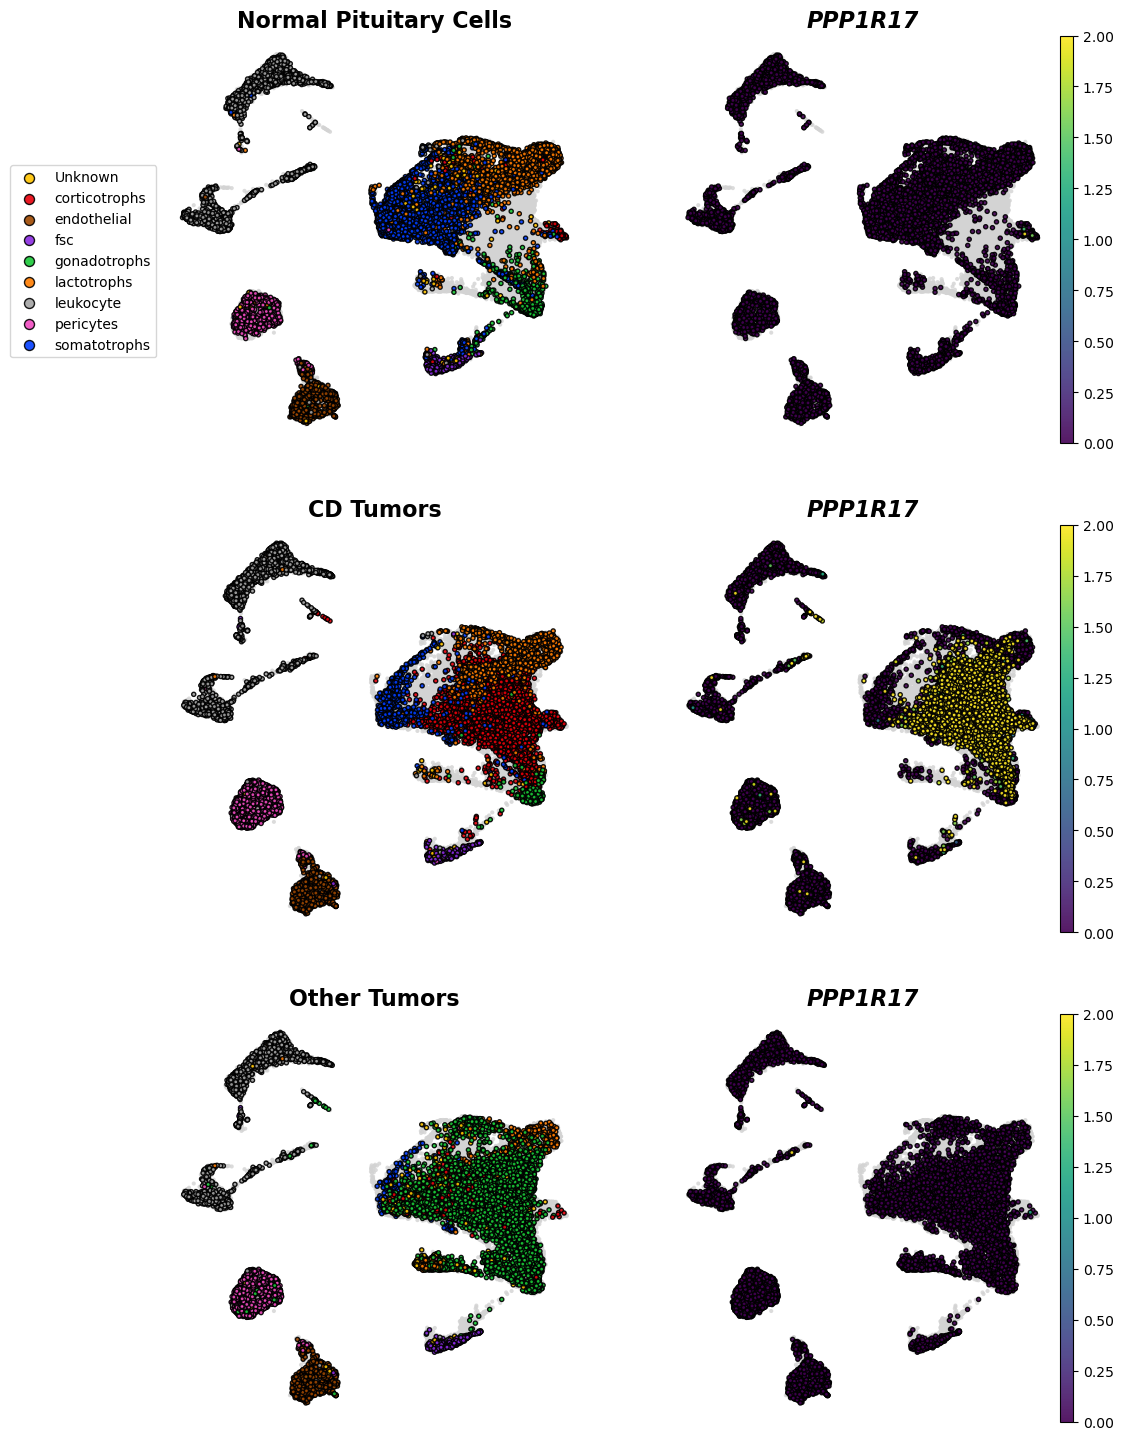

In [6]:
integrated = sc.read_h5ad('../../results/integrated/integrated_GEX.h5ad')
integrated_sc = sc.read_h5ad('../../results/SC_GEX/integrated/integrated_SC.h5ad')

CD_tumor = integrated_sc[integrated_sc.obs['orig.ident'].isin(['p2_cd_T', 'p3_cd_T', 'p4_gh_T'])]
Other_tumor = integrated_sc[integrated_sc.obs['orig.ident'].isin(['p5_nf_M', 'p4_gh_T'])]
Normal = integrated_sc[integrated_sc.obs['orig.ident'].isin(['p2_cd_N', 'p3_cd_N', 'p4_gh_N'])]

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3,ncols=2,figsize=(12,18))
sc.pl.umap(integrated_sc, 
               use_raw = False, 
               frameon=False, 
               show=False,
               ax = ax1,
               s = 35,
               alpha = 0.8,
               )
sc.pl.umap(Normal, 
               use_raw = False, 
               frameon=False, 
               show=False,
               ax = ax1,
               color = "pred.type", 
               s = 35,
               palette = ct_dict,
               edgecolor = 'black', 
               alpha = 0.9
               )

ax1.set_title('Normal Pituitary Cells', fontweight="bold", fontsize=16)
leg = ax1.legend(prop = {'size':'10'}, markerscale=1.2, bbox_to_anchor=(0, 0.7)
               )
for lh in leg.legendHandles: 
    lh.set_alpha(0.9)
    lh.set_edgecolor("black")

sc.pl.umap(integrated_sc, 
               use_raw = False, 
               frameon=False, 
               show=False,
               ax = ax2,
               s = 35,
               alpha = 0.8,
               )
sc.pl.umap(Normal, 
                   use_raw = False, 
                   frameon=False, 
                   show=False,
                   ax = ax2,
                   color = "PPP1R17", 
                   s = 35,
                   cmap='viridis',
                   edgecolor = 'black', 
                   alpha = 0.9,
                   vmin=0, vmax=2
                   )
ax2.set_title('PPP1R17', fontweight='bold', fontstyle='italic', fontsize=16)

sc.pl.umap(integrated_sc, 
               use_raw = False, 
               frameon=False, 
               show=False,
               ax = ax3,
               s = 35,
               alpha = 0.8,
               )
sc.pl.umap(CD_tumor, 
               use_raw = False, 
               frameon=False, 
               show=False,
               ax = ax3,
               color = "pred.type", 
               s = 35,
               palette = ct_dict,
               edgecolor = 'black', 
               alpha = 0.9
               )

ax3.set_title('CD Tumors', fontweight="bold", fontsize=16)
ax3.get_legend().remove()

sc.pl.umap(integrated_sc, 
               use_raw = False, 
               frameon=False, 
               show=False,
               ax = ax4,
               s = 35,
               alpha = 0.8,
               )
sc.pl.umap(CD_tumor, 
                   use_raw = False, 
                   frameon=False, 
                   show=False,
                   ax = ax4,
                   color = "PPP1R17", 
                   s = 35,
                   cmap='viridis',
                   edgecolor = 'black', 
                   alpha = 0.9,
                   vmin=0, vmax=2
                   )
ax4.set_title('PPP1R17', fontweight='bold', fontstyle='italic', fontsize=16)

sc.pl.umap(integrated_sc, 
               use_raw = False, 
               frameon=False, 
               show=False,
               ax = ax5,
               s = 35,
               alpha = 0.8,
               )

sc.pl.umap(Other_tumor, 
               use_raw = False, 
               frameon=False, 
               show=False,
               ax = ax5,
               color = "pred.type", 
               s = 35,
               palette = ct_dict,
               edgecolor = 'black', 
               alpha = 0.9
               )

ax5.set_title('Other Tumors', fontweight="bold", fontsize=16)
ax5.get_legend().remove()

sc.pl.umap(integrated_sc, 
               use_raw = False, 
               frameon=False, 
               show=False,
               ax = ax6,
               s = 35,
               alpha = 0.8,
               )
sc.pl.umap(Other_tumor, 
                   use_raw = False, 
                   frameon=False, 
                   show=False,
                   ax = ax6,
                   color = "PPP1R17", 
                   s = 35,
                   cmap='viridis',
                   edgecolor = 'black', 
                   alpha = 0.9,
                   vmin=0, vmax=2
                   )
ax6.set_title('PPP1R17', fontweight='bold', fontstyle='italic', fontsize=16)
fig.savefig('old_sc_r17_groups.pdf', bbox_inches='tight')